### Chunking

In [1]:
import nltk
import svgling
#The svgling package is a pure python package for doing single-pass rendering of linguistics-style constituent trees into SVG

In [2]:
sentence = [("the","DT"),("little","JJ"),("yellow","JJ"),("dog","NN"),("barked","VBD"),("at","IN"),("the","DT"),("cat","NN")]

In [3]:
grammer = "NP:{<DT>?<JJ>*<NN>}"
#productions from CFG for NP and VP

In [4]:
cp = nltk.RegexpParser(grammer)

In [5]:
result = cp.parse(sentence)

In [6]:
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


#### svgling >>> It is primarily intended for integrating with Jupyter notebooks,
#### but could be used to generate SVG diagrams for all sorts of other purposes

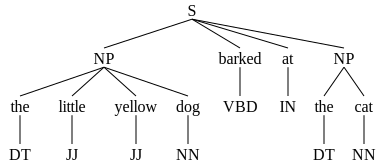

In [7]:
svgling.draw_tree(result)

### Chinking

In [8]:
chinkgrammer = r"""NP:{<.*>+}
                       }<VB.?|IN|DT|TO>+{"""

In [9]:
cp1 = nltk.RegexpParser(chinkgrammer)

In [10]:
result1 = cp1.parse(sentence)

In [11]:
print(result1)

(S
  the/DT
  (NP little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  the/DT
  (NP cat/NN))


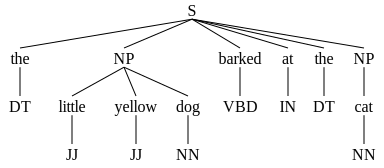

In [12]:
svgling.draw_tree(result1)

### chunking for given document LoR sample sentance

In [13]:
from nltk import pos_tag
sen2 = "I am pleased to recommend MrXX for an MS in Computer Science at your esteemed university.".split()

In [14]:
print("After Split:",sen2)

After Split: ['I', 'am', 'pleased', 'to', 'recommend', 'MrXX', 'for', 'an', 'MS', 'in', 'Computer', 'Science', 'at', 'your', 'esteemed', 'university.']


In [15]:
tokens_tag2 = pos_tag(sen2)
print("After Token:",tokens_tag2)

After Token: [('I', 'PRP'), ('am', 'VBP'), ('pleased', 'JJ'), ('to', 'TO'), ('recommend', 'VB'), ('MrXX', 'NNP'), ('for', 'IN'), ('an', 'DT'), ('MS', 'NNP'), ('in', 'IN'), ('Computer', 'NNP'), ('Science', 'NNP'), ('at', 'IN'), ('your', 'PRP$'), ('esteemed', 'FW'), ('university.', 'NN')]


In [16]:
gram2= "NP:{<NN.?>*<VBP.?>*<JJ.?>*<FW>?}" #noun-verb-adjective-foreign word
cp2 = nltk.RegexpParser(gram2)

In [17]:
result2 = cp2.parse(tokens_tag2)

In [18]:
print(result2)

(S
  I/PRP
  (NP am/VBP pleased/JJ)
  to/TO
  recommend/VB
  (NP MrXX/NNP)
  for/IN
  an/DT
  (NP MS/NNP)
  in/IN
  (NP Computer/NNP Science/NNP)
  at/IN
  your/PRP$
  (NP esteemed/FW)
  (NP university./NN))


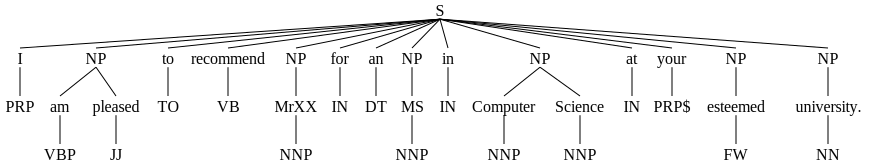

In [19]:
svgling.draw_tree(result2)

### chinking for sample sentence from LoR

In [20]:
chinkgrammer1 = r"""NP:{<.*>+}
                       }<VB.?|IN|DT|TO>+{"""

In [21]:
cp3 = nltk.RegexpParser(chinkgrammer1)

In [22]:
result3 = cp3.parse(tokens_tag2)

In [23]:
print(result3)

(S
  (NP I/PRP)
  am/VBP
  (NP pleased/JJ)
  to/TO
  recommend/VB
  (NP MrXX/NNP)
  for/IN
  an/DT
  (NP MS/NNP)
  in/IN
  (NP Computer/NNP Science/NNP)
  at/IN
  (NP your/PRP$ esteemed/FW university./NN))


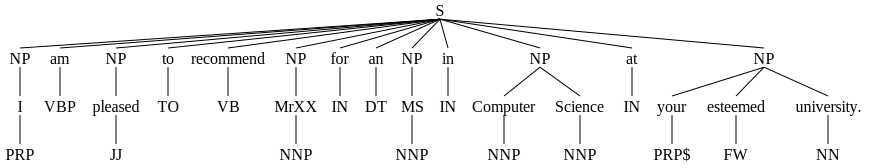

In [24]:
svgling.draw_tree(result3)

### Named Entity Recognition (NER)

In [25]:
chunks = nltk.ne_chunk(tokens_tag2)

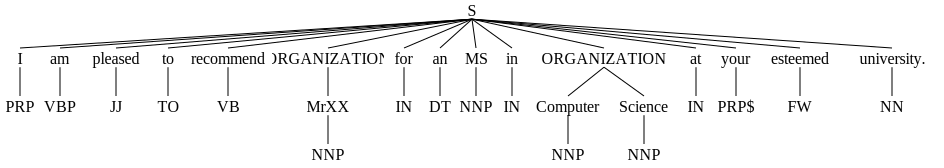

In [26]:
svgling.draw_tree(chunks)

In [27]:
entities = {}
for chunk in chunks:
    if type(chunk) is nltk.Tree:
        t = ''.join(c[0] for c in chunk.leaves())
        entities[t] = chunk.label()

In [28]:
print(entities)

{'MrXX': 'ORGANIZATION', 'ComputerScience': 'ORGANIZATION'}


## Working over complete LoR documents

In [29]:
LoRtxt1=open('C:/Users/HP/Downloads/datasets/LoR Sample 1.txt','r').read()
LoRtxt2=open('C:/Users/HP/Downloads/datasets/LoR Sample 2.txt','r').read()

In [30]:
tokentxt1=pos_tag(LoRtxt1)
tokentxt2=pos_tag(LoRtxt2)

In [31]:
LoRgrammer= "NP:{<DT><NN.?>*<VBP.?>*<JJ.?>*<FW>?<NN.?>}" 
LoRcp = nltk.RegexpParser(LoRgrammer)

In [32]:
LoRresult1 = LoRcp.parse(tokentxt1)
LoRresult2 = LoRcp.parse(tokentxt2)

In [33]:
print(LoRresult1)

(S
  T/NNP
  O/NNP
   /NNP
  W/NNP
  H/NNP
  O/NNP
  M/NNP
  S/NNP
  O/NNP
  E/NNP
  V/NNP
  E/NNP
  R/NNP
   /NNP
  I/PRP
  T/NNP
   /NNP
  M/NNP
  A/NNP
  Y/NNP
   /NNP
  C/NNP
  O/NNP
  N/NNP
  C/NNP
  E/NNP
  R/NNP
  N/NNP
  
/NNP
  
/NNP
  I/PRP
   /VBP
  (NP a/DT m/NN  /NNP p/NN l/NN)
  e/VBZ
  (NP a/DT s/JJ e/NN)
  d/NN
   /NNP
  t/NN
  o/NN
   /NNP
  r/NN
  e/NN
  c/VBP
  o/JJ
  m/NN
  m/NN
  e/NN
  n/JJ
  d/NN
   /NNP
  M/NNP
  r/NN
  X/NNP
  X/NNP
   /NNP
  f/VBD
  o/JJ
  r/NN
   /VBD
  (NP a/DT n/JJ  /NNP)
  M/NNP
  S/NNP
   /NNP
  i/NN
  n/VBP
   /NNP
  C/NNP
  o/MD
  m/VB
  p/JJ
  u/JJ
  t/NN
  e/NN
  r/NN
   /NNP
  S/NNP
  c/NN
  i/NN
  e/VBP
  n/JJ
  c/NN
  e/NN
   /VBZ
  (NP a/DT t/NN  /NNP y/NNP)
  o/MD
  u/VB
  r/NN
   /NNP
  e/NN
  s/NN
  t/NN
  e/NN
  e/VBP
  m/NN
  e/NN
  d/NN
   /NNP
  u/JJ
  n/NN
  i/NN
  v/VBP
  e/NN
  r/NN
  s/NN
  i/NN
  t/VBP
  y/NN
  ./.
   /NN
  I/PRP
   /VBP
  h/PDT
  (NP a/DT v/NN e/NN  /NNP k/NN n/NNP)
  o/VBZ
  w/JJ
  n/JJ
   /NN
  h/NN

In [34]:
LoRresult1.draw()

In [35]:
svgling.draw_tree(LoRresult1)

In [36]:
print(LoRresult2)

(S
  L/NNP
  E/NNP
  T/NNP
  T/NNP
  E/NNP
  R/NNP
   /NNP
  O/NNP
  F/NNP
   /NNP
  R/NNP
  E/NNP
  C/NNP
  O/NNP
  M/NNP
  M/NNP
  E/NNP
  N/NNP
  D/NNP
  A/NNP
  T/NNP
  I/PRP
  O/NNP
  N/NNP
  
/NNP
  I/PRP
   /VBP
  (NP a/DT m/NN  /NN)
  h/VBD
  (NP
    a/DT
    p/NN
    p/NN
    y/NN
     /NNP
    t/NN
    o/NN
     /NNP
    w/NN
    r/NN
    i/NN
    t/VBP
    e/NN)
   /NNP
  t/NN
  h/NN
  i/JJ
  s/VBP
   /JJ
  l/NN
  e/NN
  t/NN
  t/NN
  e/NN
  r/NN
   /NNP
  o/VBZ
  f/JJ
   /NNP
  r/NN
  e/NN
  c/VBP
  o/JJ
  m/NN
  m/NN
  e/NN
  n/JJ
  d/VBZ
  (NP a/DT t/NN i/NN o/VBP n/JJ  /NNP)
  f/NN
  o/NN
  r/NN
   /VBZ
  A/NNP
  A/NNP
  A/NNP
   /NNP
  w/NN
  h/NN
  o/IN
   /NN
  i/NN
  n/VBP
  t/NN
  e/NN
  n/JJ
  d/NN
  s/NN
   /NNP
  t/NN
  o/NN
   /NNP
  p/NN
  u/JJ
  r/NN
  s/NN
  u/JJ
  e/NN
   /VBD
  (NP a/DT  /NNP M/NNP)
  (NP a/DT s/JJ t/NN)
  e/NN
  r/NN
  '/''
  s/JJ
   /NNP
  d/NN
  e/NN
  g/NN
  r/NN
  e/NN
  e/NN
   /VBZ
  (NP a/DT t/NN  /NNP y/NNP)
  o/MD
  u/VB
  r/NN
  

In [37]:
LoRresult2.draw()

In [38]:
svgling.draw_tree(LoRresult2)

### NER for complete LoR

In [39]:
LoRchunks1 = nltk.ne_chunk(tokentxt1)
LoRchunks2 = nltk.ne_chunk(tokentxt2)

In [40]:
svgling.draw_tree(LoRchunks1)
svgling.draw_tree(LoRchunks2)

In [41]:
LoRentities1 = {}
for chunk in LoRchunks1:
    if type(chunk) is nltk.Tree:
        t = ''.join(c[0] for c in chunk.leaves())
        LoRentities1[t] = chunk.label()
print(LoRentities1)

{}


In [42]:
LoRentities2 = {}
for chunk in LoRchunks2:
    if type(chunk) is nltk.Tree:
        t = ''.join(c[0] for c in chunk.leaves())
        LoRentities2[t] = chunk.label()
print(LoRentities2)

{'F': 'PERSON'}
